In [1]:
# Topik Dataset: Salary Data (Data Gaji)
# Willi

# Import library yang dibutuhkan.
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv("D:\data-gaji\data\salary_data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
# Data Cleansing (Pembersihan Data)
## Sudah aman datanya.

<AxesSubplot:>

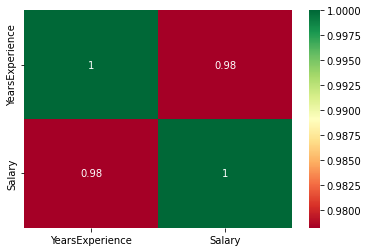

In [4]:
# Memeriksa Korelasi
sns.heatmap(df.corr(), cmap="RdYlGn", annot=True)

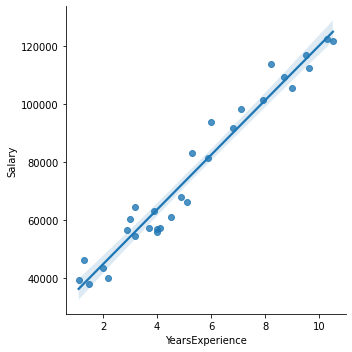

In [5]:
sns.lmplot(x="YearsExperience", y="Salary", data=df)

In [6]:
# Proses Training dan Membuat Model
## Persiapkan data
X = df[['YearsExperience']]
y = df[['Salary']]

In [7]:
## Mengimport sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [8]:
## Membuat modelnya
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
regressor.coef_, regressor.intercept_

(array([[9303.95933197]]), array([27206.42890293]))

In [10]:
x = 7.2
y = 27206.42890293 + 9303.95933197 * x
print(y)

94194.936093114


In [11]:
regressor.predict(X_test)

array([[ 90473.3523603 ],
       [ 56979.09876522],
       [ 54187.91096563],
       [ 41162.36790088],
       [ 45814.34756686],
       [ 93264.54015989],
       [ 65352.66216399],
       [116524.43848981],
       [ 64422.2662308 ]])

Text(0.5, 1.0, 'Plot Tahun Pengalaman dan Gaji')

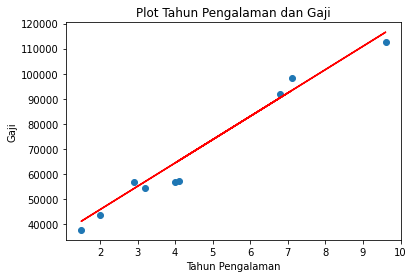

In [12]:
y_predict = regressor.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, c='r')
plt.xlabel("Tahun Pengalaman")
plt.ylabel("Gaji")
plt.title("Plot Tahun Pengalaman dan Gaji")

In [13]:
# Evaluasi Model
regressor.score(X_test, y_test)

0.9647278344670828

In [15]:
# Membuat Perbandingan Aktual dan Prediksi
y_predict = regressor.predict(X_test)

evaluate = pd.DataFrame({
    'Gaji Actual': y_test.values.flatten(), 
    'Gaji Prediksi': y_predict.flatten()
})

evaluate.head(10)

,Gaji Actual,Gaji Prediksi
0,91738.0,90473.352360
1,54445.0,56979.098765
2,56642.0,54187.910966
3,37731.0,41162.367901
4,43525.0,45814.347567
5,98273.0,93264.540160
6,57081.0,65352.662164
7,112635.0,116524.438490
8,56957.0,64422.266231


<AxesSubplot:>

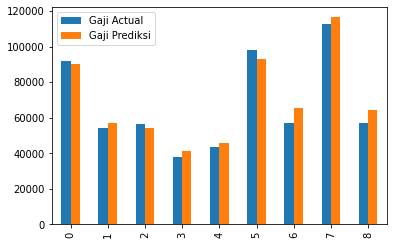

In [16]:
evaluate.head(10).plot(kind="bar")

In [17]:
# Menghitung MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_predict))

21713548.637118638
